# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [231]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [232]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [233]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [52]:
#def draw_landmarks(image, results):
#    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
#    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [234]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
    #                         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                         ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [241]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        #draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [242]:
len(results.left_hand_landmarks.landmark)

21

In [243]:
results

mediapipe.python.solution_base.SolutionOutputs

In [246]:
draw_styled_landmarks(frame, results)

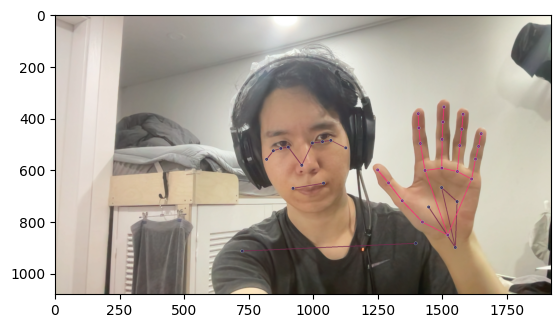

In [247]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [240]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [54]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [15]:
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    #if results.face_landmarks 
    #else np.zeros(1404)


In [146]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [147]:
result_test = extract_keypoints(results)

NameError: name 'results' is not defined

In [148]:
result_test

array([ 4.96647418e-01,  4.65857923e-01, -6.04502380e-01,  9.99990880e-01,
        5.19796669e-01,  3.79949361e-01, -5.72963178e-01,  9.99979973e-01,
        5.34989178e-01,  3.76651168e-01, -5.72199047e-01,  9.99985158e-01,
        5.48804462e-01,  3.74453694e-01, -5.71447790e-01,  9.99981761e-01,
        4.67587054e-01,  3.91989559e-01, -5.59984922e-01,  9.99976337e-01,
        4.48837310e-01,  3.96842569e-01, -5.58997750e-01,  9.99975622e-01,
        4.34039772e-01,  4.01744962e-01, -5.58917999e-01,  9.99964476e-01,
        5.72455347e-01,  4.01035666e-01, -3.41881245e-01,  9.99984026e-01,
        4.18771446e-01,  4.34507698e-01, -2.79634118e-01,  9.99974072e-01,
        5.30298054e-01,  5.36342263e-01, -5.19597292e-01,  9.99971986e-01,
        4.66047257e-01,  5.46737909e-01, -5.01037955e-01,  9.99964535e-01,
        7.40705311e-01,  7.81538308e-01, -2.17133984e-01,  9.99276876e-01,
        3.29980999e-01,  8.74655306e-01, -1.31588578e-01,  9.97267663e-01,
        8.59415054e-01,  

In [149]:
468*3+33*4+21*3+21*3

1662

In [150]:
np.save('0', result_test)

In [135]:
a = np.load('1.npy')

FileNotFoundError: [Errno 2] No such file or directory: '1.npy'

In [109]:
a.shape

(258,)

In [136]:
a

array([ 4.96647418e-01,  4.65857923e-01, -6.04502380e-01,  9.99990880e-01,
        5.19796669e-01,  3.79949361e-01, -5.72963178e-01,  9.99979973e-01,
        5.34989178e-01,  3.76651168e-01, -5.72199047e-01,  9.99985158e-01,
        5.48804462e-01,  3.74453694e-01, -5.71447790e-01,  9.99981761e-01,
        4.67587054e-01,  3.91989559e-01, -5.59984922e-01,  9.99976337e-01,
        4.48837310e-01,  3.96842569e-01, -5.58997750e-01,  9.99975622e-01,
        4.34039772e-01,  4.01744962e-01, -5.58917999e-01,  9.99964476e-01,
        5.72455347e-01,  4.01035666e-01, -3.41881245e-01,  9.99984026e-01,
        4.18771446e-01,  4.34507698e-01, -2.79634118e-01,  9.99974072e-01,
        5.30298054e-01,  5.36342263e-01, -5.19597292e-01,  9.99971986e-01,
        4.66047257e-01,  5.46737909e-01, -5.01037955e-01,  9.99964535e-01,
        7.40705311e-01,  7.81538308e-01, -2.17133984e-01,  9.99276876e-01,
        3.29980999e-01,  8.74655306e-01, -1.31588578e-01,  9.97267663e-01,
        8.59415054e-01,  

In [ ]:
a.

# 4. Setup Folders for Collection

In [148]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['house', 'thief', 'outofbreath'])

# Thirty videos worth of data
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 100

In [157]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [21]:
## extract keypoints from video
def frame_capture(action, sequence, video):
    cap = cv2.VideoCapture(video)
    
    # Set mediapipe model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        # Loop through video length aka sequence length (30 frames)
        for frame_num in range(sequence_length):
            # Read feed
            ret, frame = cap.read()
            #Make detections
            image, results = mediapipe_detection(frame, holistic)
            
            # export keypoints
            keypoints = extract_keypoints(results) # results of frame -> numpy array
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints) # save numpy array in directory
            
            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                
        cap.release()
        cv2.destroyAllWindows()

In [161]:
curDir = "/Users/ohsopp/Desktop/졸프 단어/outofbreath"
curAction = "outofbreath"
curSequence = 0
for file in os.listdir(curDir):
    if(file.endswith(".mp4")):
        path = os.path.join(curDir, file)
        frame_capture(curAction, curSequence, path)
        curSequence = curSequence + 1

In [47]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [149]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [150]:
# set accurate actions
actions = np.array(['house', 'thief', 'outofbreath'])

In [151]:
label_map = {label:num for num, label in enumerate(actions)}

In [152]:
label_map

{'house': 0, 'thief': 1, 'outofbreath': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [153]:
np.array(sequences).shape

(180, 100, 258)

In [154]:
np.array(labels).shape

(180,)

In [155]:
X = np.array(sequences)

In [156]:
X.shape

(180, 100, 258)

In [157]:
y = to_categorical(labels).astype(int)

In [158]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [160]:
y_test.shape

(9, 3)

In [161]:
y_train.shape

(171, 3)

In [162]:
X_train.shape

(171, 100, 258)

In [163]:
(X_train.Flatten()).shape

AttributeError: 'numpy.ndarray' object has no attribute 'Flatten'

# 7. Build and Train LSTM Neural Network

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

In [225]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [226]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(100,258)))
#model.add(layers.BatchNormalization())
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=True, activation='relu'))
#model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=False, activation='relu'), input_shape=(30,258)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.summary()

Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 100, 64)           82688     
                                                                 
 lstm_101 (LSTM)             (None, 100, 128)          98816     
                                                                 
 lstm_102 (LSTM)             (None, 100, 64)           49408     
                                                                 
 dense_118 (Dense)           (None, 100, 64)           4160      
                                                                 
 dense_119 (Dense)           (None, 100, 32)           2080      
                                                                 
 dense_120 (Dense)           (None, 100, 3)            99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-t

In [227]:
actions.shape[0]

3

In [117]:
model = Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258))))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu')))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=False, activation='relu')))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# ResNet block 구현

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

# Residual Block 구현
def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut Connection
    shortcut = x
    
    # Main Path
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut Connection 추가
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

In [230]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Model

# Residual Block 구현
def residual_block(x, filters, kernel_size=3, stride=1):
    # Shortcut Connection
    shortcut = x
    
    # Main Path
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv1D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    
    # Shortcut Connection 추가
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

# 입력 레이어
input_tensor = Input(shape=(129, 126))  # 입력 시퀀스 크기에 맞게 조정

# Conv1D Layer (예제에서 하나의 레이어만 사용)
x = Conv1D(64, kernel_size=3, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = ReLU()(x)

# Residual Block 3번 추가
x = residual_block(x, filters=64)
x = residual_block(x, filters=64)
x = residual_block(x, filters=64)

# Global Average Pooling
x = GlobalAveragePooling1D()(x)

# Fully Connected Layer
x = Dense(10, activation='softmax')(x)

# 모델 생성
model = Model(inputs=input_tensor, outputs=x)

# 모델 요약
model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 129, 126)]   0           []                               
                                                                                                  
 conv1d_61 (Conv1D)             (None, 129, 64)      24256       ['input_8[0][0]']                
                                                                                                  
 batch_normalization_68 (BatchN  (None, 129, 64)     256         ['conv1d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_45 (ReLU)                (None, 129, 64)      0           ['batch_normalization_68[0]

                                                                                                  
 global_average_pooling1d_6 (Gl  (None, 64)          0           ['re_lu_54[0][0]']               
 obalAveragePooling1D)                                                                            
                                                                                                  
 dense_122 (Dense)              (None, 10)           650         ['global_average_pooling1d_6[0][0
                                                                 ]']                              
                                                                                                  
Total params: 138,634
Trainable params: 137,354
Non-trainable params: 1,280
__________________________________________________________________________________________________


In [211]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# 모델 생성
model = Sequential()

# Embedding 레이어 추가 (텍스트 데이터를 벡터로 변환하는 데 사용됩니다)
vocab_size = 100  # 단어 집합의 크기
embedding_dim = 126  # 임베딩 차원
input_length = 129  # 입력 시퀀스의 길이

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

# Conv1D 레이어 추가
filters = 64  # 필터 수
kernel_size = 5  # 필터 크기

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# LSTM 레이어 추가
lstm_units = 128

model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True, activation='tanh')))
model.add(Dropout(0.5))

# 출력 레이어 추가 (클래스 수에 따라 조정)
num_classes = 10

model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# 모델 요약
model.summary()


Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 129, 126)          12600     
                                                                 
 conv1d_17 (Conv1D)          (None, 125, 64)           40384     
                                                                 
 batch_normalization_24 (Bat  (None, 125, 64)          256       
 chNormalization)                                                
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 62, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional_30 (Bidirecti  (None, 62, 256)          197632    
 onal)                                                           
                                                     

In [45]:
res = [.7, 0.2, 0.1, 0.3, 0.5, 0.2, 0.7, 0.4]

In [46]:
actions[np.argmax(res)]

'house'

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
6/6 [==============================] - 315s 52s/step - loss: 8.6787 - categorical_accuracy: 0.3216
Epoch 2/300
6/6 [==============================] - 313s 52s/step - loss: 605.9678 - categorical_accuracy: 0.4152
Epoch 3/300
1/6 [====>.........................] - ETA: 4:21 - loss: 1.0909 - categorical_accuracy: 0.3750

KeyboardInterrupt: 

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
Total params: 203,624
Trainable params: 203,624
Non-trai

# 8. Make Predictions

In [78]:
res = model.predict(X_test)

1/1 [==============================] - 1s 563ms/step


In [79]:
actions[np.argmax(res[4])]

'next'

In [80]:
actions[np.argmax(y_test[4])]

'up'

# 9. Save Weights

In [82]:
model.save('action.h5')

In [217]:
del model

In [83]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [84]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [85]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 207ms/step


In [86]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [87]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [1, 1]],

       [[3, 1],
        [0, 1]],

       [[2, 1],
        [2, 0]]])

In [88]:
accuracy_score(ytrue, yhat)

0.4

# 11. Test in Real Time

In [89]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [90]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [19]:
sequence.reverse()

In [23]:
len(sequence)

1

In [91]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [92]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Showㅂ to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 210ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 211ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 203ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 202ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 208ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 204ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 206ms/step
up
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 207ms/step
up
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 202ms/step
up
<class 'mediapipe.pytho

1/1 [==============================] - 0s 206ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 209ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 209ms/step
front
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 211ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 204ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 207ms/step
up
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 213ms/step
up
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 204ms/step
up
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 228ms/step
up
<class 'mediapipe.python.so

1/1 [==============================] - 0s 212ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 208ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 214ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 207ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 213ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 212ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 212ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 211ms/step
next
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 210ms/step
next
<class 'mediapipe.pyth

In [197]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)